In [3]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

pd.read_csv

nt = pd.read_csv('netflix_titles.csv')

nt.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [18]:
nt.shape

(8800, 13)

In [5]:
nt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Production Trend for both Movies and TV Shows over the years

In [6]:
# Convert 'date_added' to datetime format
nt['date_added'] = pd.to_datetime(nt['date_added'])

# Extract the year from 'date_added'
nt['year_added'] = nt['date_added'].dt.year

# Count the number of movies and TV shows per year
movies_per_year = nt[nt['type'] == 'Movie'].groupby('year_added')['show_id'].count()
tv_shows_per_year = nt[nt['type'] == 'TV Show'].groupby('year_added')['show_id'].count()

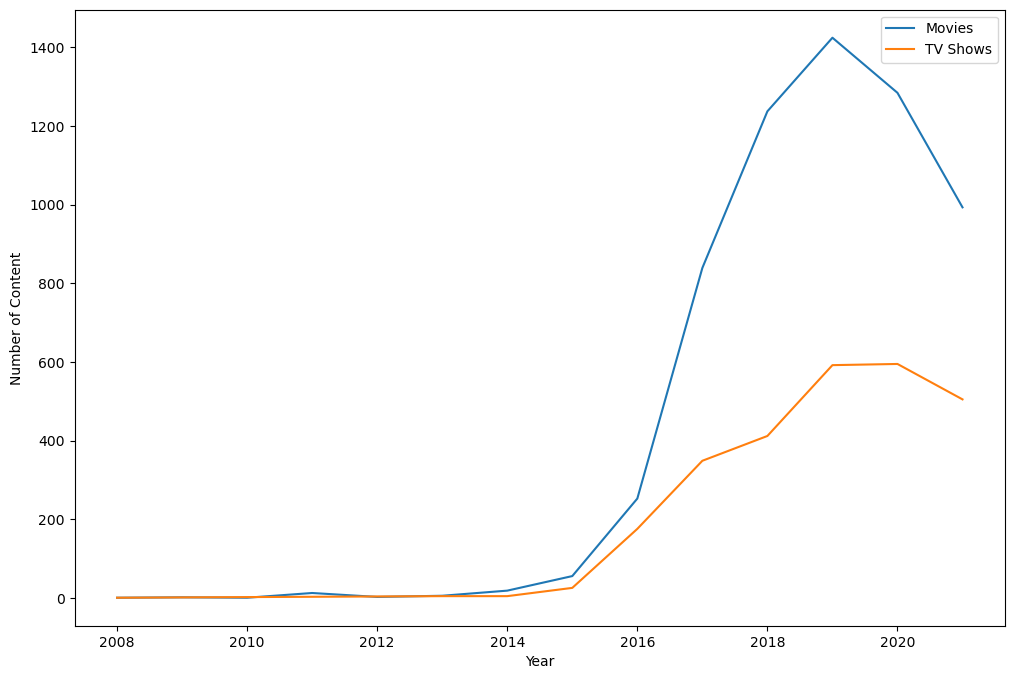

In [8]:
# Plot trend for both Movies and TV Shows
plt.figure(figsize = (12,8))
sns.lineplot(movies_per_year, label = 'Movies')
sns.lineplot(tv_shows_per_year, label = 'TV Shows')

plt.ylabel('Number of Content')
plt.xlabel('Year')

plt.show()

### Analyze the Distribution of Content in Netflix

In [11]:
# Count the occurrences of each unique rating
rating_counts = nt['rating'].value_counts()
rating_counts

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [14]:
# Remove entries with invalid ratings
valid_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR']
nt = nt[nt['rating'].isin(valid_ratings)]

rating_counts = nt['rating'].value_counts()
rating_counts

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

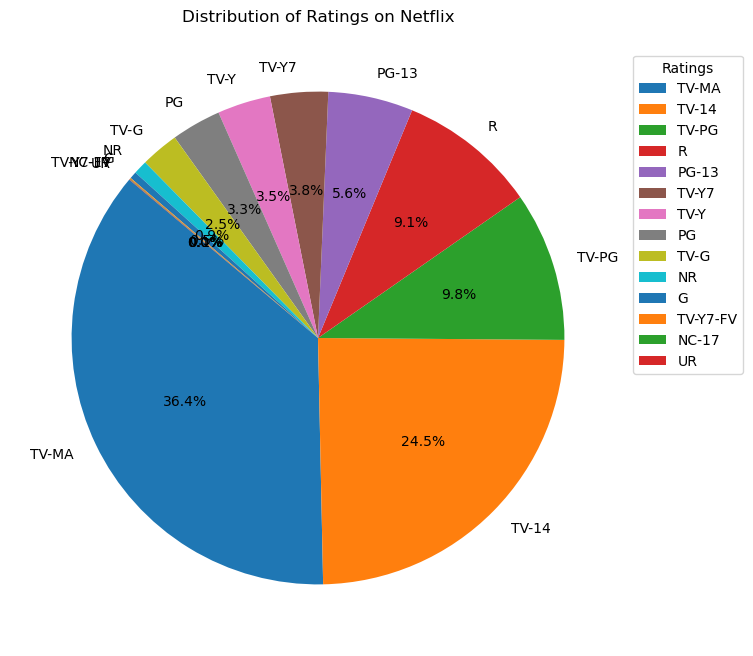

In [16]:
# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Ratings on Netflix')
plt.legend(title='Ratings', bbox_to_anchor=(1, 0.7), loc="center left")
plt.show()

### Top 5 Directors for both Movies and TV Shows

In [20]:
directors_movies = nt[nt['type'] == 'Movie']['director'].dropna().str.split(', ', expand=True)
directors_tv_shows = nt[nt['type'] == 'TV Show']['director'].dropna().str.split(', ', expand=True)

# Frequency of each director for movies and TV shows
top_directors_movies = directors_movies.stack().value_counts().head(5)
top_directors_tv_shows = directors_tv_shows.stack().value_counts().head(5)

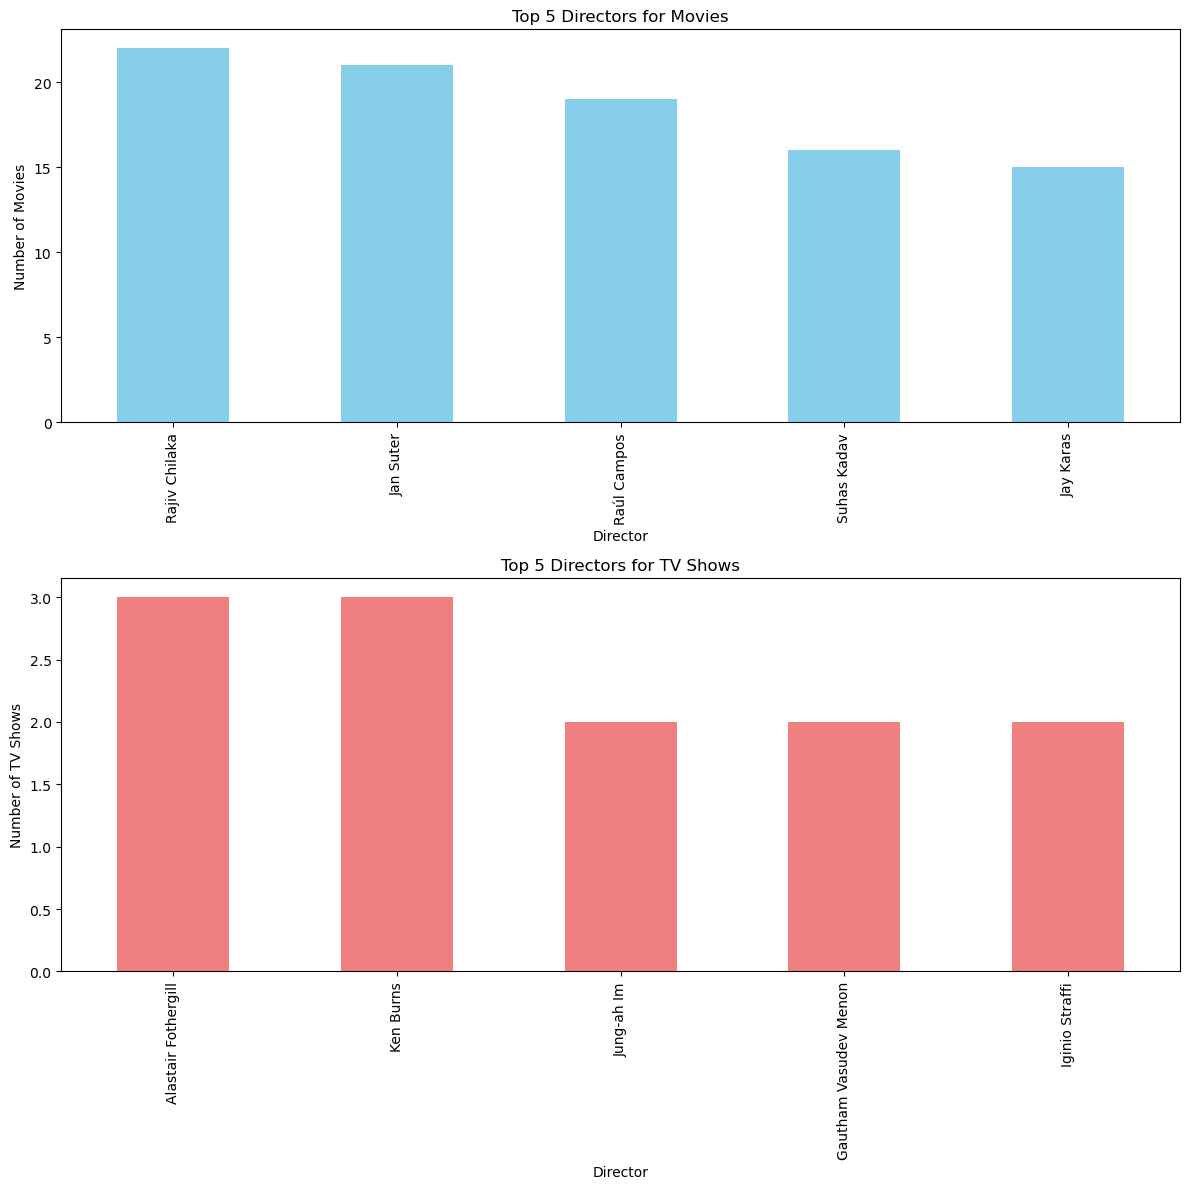

In [25]:
plt.figure(figsize=(12, 12))

# Bar plot for movies
plt.subplot(2, 1, 1)
top_directors_movies.plot(kind='bar', color='skyblue')
plt.title('Top 5 Directors for Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')

# Bar plot for TV shows
plt.subplot(2, 1, 2)
top_directors_tv_shows.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Directors for TV Shows')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()